# evaluate_asd_a2

@author: David Clemens-Sewall

Notebook for evaluating level a2 asd product



In [19]:
# Imports
import os
import glob
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.dates as mdates
import seaborn as sns

%matplotlib inline

In [25]:
# Figure export path
fg_dir = os.path.join('..', '..', 'figures')

In [2]:
# Load data
a2_dir = os.path.join('..', '..', 'export', 'final-upload-data', 'spectral_albedo_2024', 'a2')
filepaths = glob.glob(os.path.join(a2_dir, '*.a2.h5'))

ls_a2 = []
for a2_path in filepaths:
    ls_a2.append(pd.read_hdf(a2_path, mode='r'))

df_a2 = pd.concat(ls_a2, copy=False)

## 1. Examine the frequency of different flags

### 1.a incident, offset  and slope filters

In [5]:
# incident, offset and slope filters are applied to the entire scan, 
# so we only need examine a single wavelength
df_scan_filt = df_a2.query('variable == "asd_quality_flag" & wavelength == 350.0')

In [6]:
df_scan_filt.value_counts(dropna=False)

value
1.0      1052
4.0        56
2.0        48
Name: count, dtype: int64

In [486]:
(56+48)/(1052+56+48)

0.08996539792387544

C:\Users\dcsewall\AppData\Local\miniconda3\envs\basic_plotting\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1258: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
C:\Users\dcsewall\AppData\Local\miniconda3\envs\basic_plotting\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1258: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
C:\Users\dcsewall\AppData\Local\miniconda3\envs\basic_plotting\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1258: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


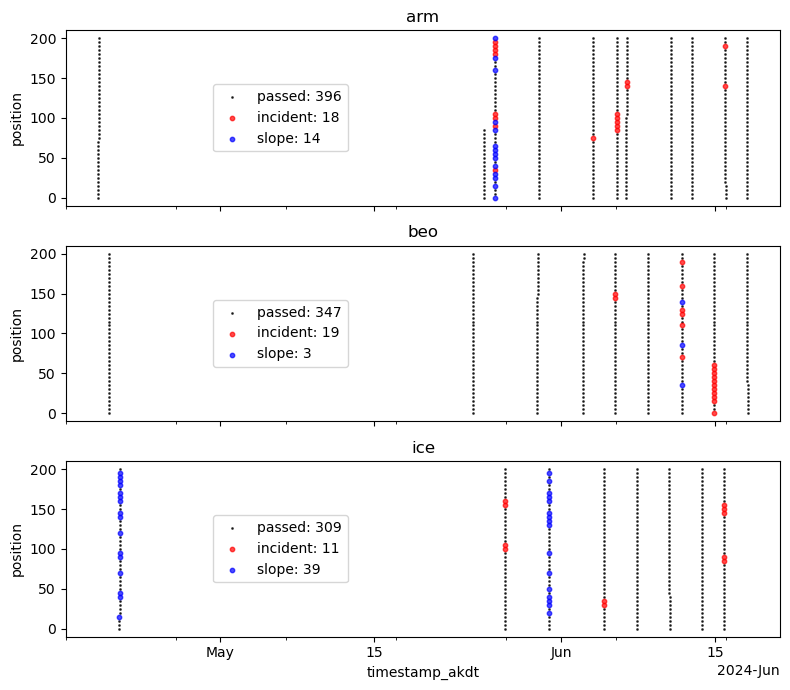

In [30]:
# Plot timeseries of filtered scans

f, axs = plt.subplots(3, 1, sharex=True, figsize=(8, 7), tight_layout=True)
locator = mdates.AutoDateLocator(minticks=3, maxticks=7)
formatter = mdates.ConciseDateFormatter(locator)


site = 'arm'
iax = 0
df_temp = df_scan_filt.query('site == @site & value == 1.0').reset_index()
df_temp.plot(x='timestamp_akdt', y='position', c='k', ax=axs[iax], kind='scatter',
            s=1, alpha=0.7)
n_pass = df_temp.shape[0]
df_temp = df_scan_filt.query('site == @site & value == 2.0').reset_index()
df_temp.plot(x='timestamp_akdt', y='position', c='r', ax=axs[iax], kind='scatter',
            s=10, alpha=0.7)
n_inc = df_temp.shape[0]
df_temp = df_scan_filt.query('site == @site & value == 4.0').reset_index()
df_temp.plot(x='timestamp_akdt', y='position', c='b', ax=axs[iax], kind='scatter',
            s=10, alpha=0.7)
n_slop = df_temp.shape[0]
axs[iax].legend(['passed: '+str(n_pass), 'incident: '+ str(n_inc), 
                 'slope: ' + str(n_slop)], loc='center', bbox_to_anchor=(0.3, 0.5))
axs[iax].set_title(site)

site = 'beo'
iax = 1
df_temp = df_scan_filt.query('site == @site & value == 1.0').reset_index()
df_temp.plot(x='timestamp_akdt', y='position', c='k', ax=axs[iax], kind='scatter',
            s=1, alpha=0.7)
n_pass = df_temp.shape[0]
df_temp = df_scan_filt.query('site == @site & value == 2.0').reset_index()
df_temp.plot(x='timestamp_akdt', y='position', c='r', ax=axs[iax], kind='scatter',
            s=10, alpha=0.7)
n_inc = df_temp.shape[0]
df_temp = df_scan_filt.query('site == @site & value == 4.0').reset_index()
df_temp.plot(x='timestamp_akdt', y='position', c='b', ax=axs[iax], kind='scatter',
            s=10, alpha=0.7)
n_slop = df_temp.shape[0]
axs[iax].legend(['passed: '+str(n_pass), 'incident: '+ str(n_inc), 
                 'slope: ' + str(n_slop)], loc='center', bbox_to_anchor=(0.3, 0.5))
axs[iax].set_title(site)

site = 'ice'
iax = 2
df_temp = df_scan_filt.query('site == @site & value == 1.0').reset_index()
df_temp.plot(x='timestamp_akdt', y='position', c='k', ax=axs[iax], kind='scatter',
            s=1, alpha=0.7)
n_pass = df_temp.shape[0]
df_temp = df_scan_filt.query('site == @site & value == 2.0').reset_index()
df_temp.plot(x='timestamp_akdt', y='position', c='r', ax=axs[iax], kind='scatter',
            s=10, alpha=0.7)
n_inc = df_temp.shape[0]
df_temp = df_scan_filt.query('site == @site & value == 4.0').reset_index()
df_temp.plot(x='timestamp_akdt', y='position', c='b', ax=axs[iax], kind='scatter',
            s=10, alpha=0.7)
n_slop = df_temp.shape[0]
axs[iax].legend(['passed: '+str(n_pass), 'incident: '+ str(n_inc), 
                 'slope: ' + str(n_slop)], loc='center', bbox_to_anchor=(0.3, 0.5))
axs[iax].set_title(site)
axs[-1].xaxis.set_major_locator(locator)
axs[-1].xaxis.set_major_formatter(formatter)

# Save figure
f.savefig(os.path.join(fg_dir, 'filt_inc_slope_summary.png'), bbox_inches='tight')

### 1.b Examine the frequency of standard deviation and nonphysical filtering

In [49]:
df_flag_cts = df_a2.query('variable == "asd_quality_flag"').set_index(
    'value', append=True).groupby(level=['wavelength', 'value']).size(
    ).reset_index().pivot(columns='value', index='wavelength', values=0)

In [85]:
df_flag_frc = df_flag_cts.div(df_flag_cts.sum(axis=1), axis='index')

In [71]:
df_inc = df_a2.query('variable == "incident_solar_counts"').reset_index().drop(
    columns=['site', 'location', 'position', 'repetition'])
df_inc['month'] = df_inc['timestamp_akdt'].dt.month
df_inc = df_inc[['month', 'wavelength', 'value']].groupby(by=['month', 'wavelength']).agg(['mean', 'max'])
df_inc.columns = df_inc.columns.droplevel(level=0)

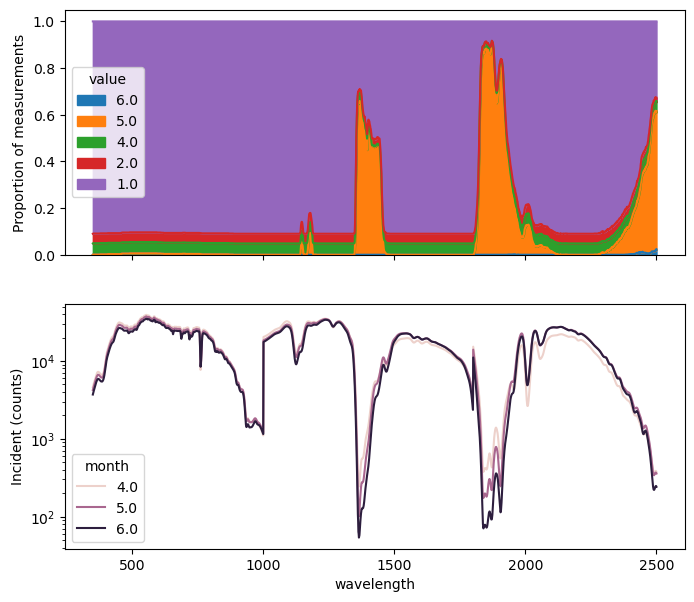

In [88]:
f, axs = plt.subplots(2, 1, sharex=True, figsize=(8,7))

df_flag_frc.sort_index(axis=1, ascending=False).plot.area(ax=axs[0])
#axs[0].set_yscale('log')
axs[0].set_ylabel('Proportion of measurements')

#sns.lineplot(data=df_inc, x='wavelength', y='max', hue='month', ls='--', ax=axs[1])
sns.lineplot(data=df_inc, x='wavelength', y='mean', hue='month', ls='-', ax=axs[1])

axs[1].set_yscale('log')
axs[1].set_ylabel('Incident (counts)')

f.savefig(os.path.join(fg_dir, 'filt_wavelength_summary.png'), bbox_inches='tight')

## 2. Examine case studies of issues with filters

### 2.a Incident and slope filters (20240525-arm and 20240611-beo and 20240530-ice)

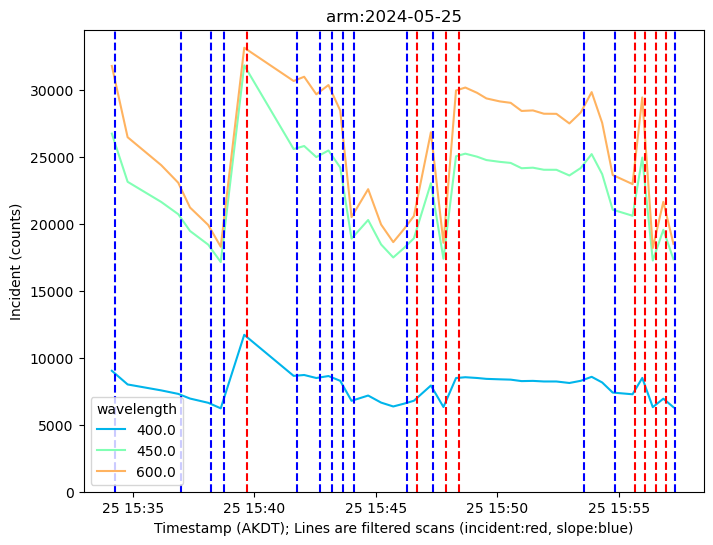

In [227]:
day = '2024-05-25'
site = 'arm'

# Get data just from requested day-site
df_day_site = df_a2.xs((slice(day, day), site), 
                       level=('timestamp_akdt', 'site'), drop_level=False)

# Plot incident over time at a collection of wavelengths
wvs = [400, 450, 600]#, 800, 1200, 1600, 2200]

f, ax = plt.subplots(1,1, figsize=(8,6))

# Plot incident over time
df_temp = df_day_site.query('variable == "incident_solar_counts" & wavelength in @wvs').reset_index()
df_temp['wavelength'] = df_temp['wavelength'].astype('str')
sns.lineplot(data=df_temp, x='timestamp_akdt', y='value', hue='wavelength', 
                  palette='rainbow', ax=ax)
ymin, ymax = ax.get_ylim()
ax.set_ylim([0, ymax])

# Plot filtered scans
df_filt = df_day_site.query('variable == "asd_quality_flag" & wavelength == 350.0')
ymin, ymax = ax.get_ylim()
ax.vlines(x=df_filt.loc[df_filt['value']==2.0].index.get_level_values('timestamp_akdt').values,
          ymin=ymin, ymax=ymax, ls='--', color='r')
ax.vlines(x=df_filt.loc[df_filt['value']==4.0].index.get_level_values('timestamp_akdt').values,
          ymin=ymin, ymax=ymax, ls='--', color='b')

ax.set_ylabel('Incident (counts)')
ax.set_xlabel('Timestamp (AKDT); Lines are filtered scans (incident:red, slope:blue)')
ax.set_title(site + ':' + day)
f.savefig(os.path.join(fg_dir, 'filt_inc_slope_'+day+'_'+site+'.png'), bbox_inches='tight')

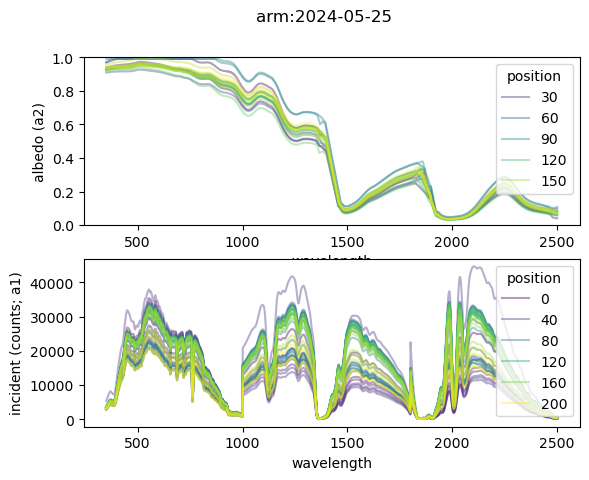

In [228]:
# Plot summary figure

f, axs = plt.subplots(2,1)

# Get filtered data for plotting albedo
df_temp = df_day_site.query('variable in ["albedo", "incident_solar_counts", '+
                            '"reflected_solar_counts", "asd_quality_flag"]').reset_index(
    ).drop(columns=['timestamp_akdt', 'site', 'location', 'repetition']).pivot(
    index=['wavelength', 'position'], columns='variable', values='value')
df_temp = df_temp.loc[df_temp['asd_quality_flag'] == 1.0]

sns.lineplot(data=df_temp, x='wavelength', y='albedo',
            hue='position', ax=axs[0], alpha=0.4, palette='viridis')
axs[0].set_ylim([0, 1])
axs[0].set_ylabel('albedo (a2)')
sns.move_legend(axs[0], loc='upper right')

sns.lineplot(data=df_day_site.query('variable == "incident_solar_counts"'), x='wavelength', y='value',
            hue='position', ax=axs[1], alpha=0.4, palette='viridis')
axs[1].set_ylabel('incident (counts; a1)')

f.suptitle(site + ':' + day)

f.savefig(os.path.join(fg_dir, day+'_'+site+'.a2.png'), bbox_inches='tight')

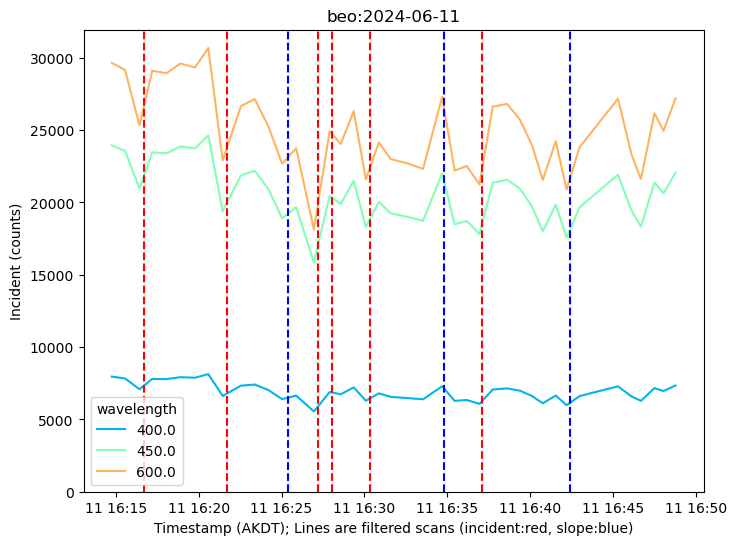

In [484]:
day = '2024-06-11'
site = 'beo'

# Get data just from requested day-site
df_day_site = df_a2.xs((slice(day, day), site), 
                       level=('timestamp_akdt', 'site'), drop_level=False)

# Plot incident over time at a collection of wavelengths
wvs = [400, 450, 600]#, 800, 1200, 1600, 2200]

f, ax = plt.subplots(1,1, figsize=(8,6))

# Plot incident over time
df_temp = df_day_site.query('variable == "incident_solar_counts" & wavelength in @wvs').reset_index()
df_temp['wavelength'] = df_temp['wavelength'].astype('str')
sns.lineplot(data=df_temp, x='timestamp_akdt', y='value', hue='wavelength', 
                  palette='rainbow', ax=ax)
ymin, ymax = ax.get_ylim()
ax.set_ylim([0, ymax])

# Plot filtered scans
df_filt = df_day_site.query('variable == "asd_quality_flag" & wavelength == 350.0')
ymin, ymax = ax.get_ylim()
ax.vlines(x=df_filt.loc[df_filt['value']==2.0].index.get_level_values('timestamp_akdt').values,
          ymin=ymin, ymax=ymax, ls='--', color='r')
ax.vlines(x=df_filt.loc[df_filt['value']==4.0].index.get_level_values('timestamp_akdt').values,
          ymin=ymin, ymax=ymax, ls='--', color='b')

ax.set_ylabel('Incident (counts)')
ax.set_xlabel('Timestamp (AKDT); Lines are filtered scans (incident:red, slope:blue)')
ax.set_title(site + ':' + day)
f.savefig(os.path.join(fg_dir, 'filt_inc_slope_'+day+'_'+site+'.png'), bbox_inches='tight')

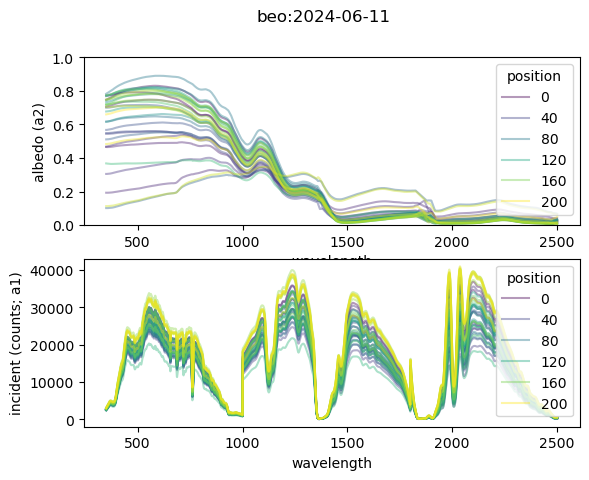

In [485]:
# Plot summary figure

f, axs = plt.subplots(2,1)

# Get filtered data for plotting albedo
df_temp = df_day_site.query('variable in ["albedo", "incident_solar_counts", '+
                            '"reflected_solar_counts", "asd_quality_flag"]').reset_index(
    ).drop(columns=['timestamp_akdt', 'site', 'location', 'repetition']).pivot(
    index=['wavelength', 'position'], columns='variable', values='value')
df_temp = df_temp.loc[df_temp['asd_quality_flag'] == 1.0]

sns.lineplot(data=df_temp, x='wavelength', y='albedo',
            hue='position', ax=axs[0], alpha=0.4, palette='viridis')
axs[0].set_ylim([0, 1])
axs[0].set_ylabel('albedo (a2)')
sns.move_legend(axs[0], loc='upper right')

sns.lineplot(data=df_day_site.query('variable == "incident_solar_counts"'), x='wavelength', y='value',
            hue='position', ax=axs[1], alpha=0.4, palette='viridis')
axs[1].set_ylabel('incident (counts; a1)')

f.suptitle(site + ':' + day)

f.savefig(os.path.join(fg_dir, day+'_'+site+'.a2.png'), bbox_inches='tight')

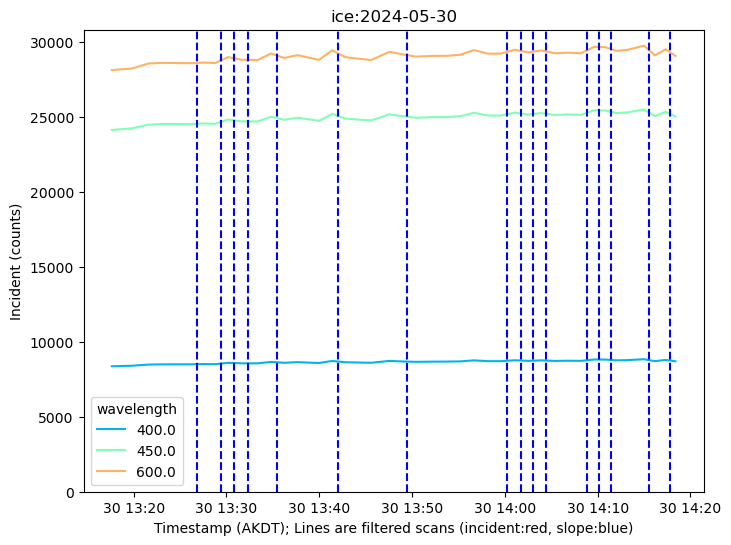

In [204]:
day = '2024-05-30'
site = 'ice'

# Get data just from requested day-site
df_day_site = df_a2.xs((slice(day, day), site), 
                       level=('timestamp_akdt', 'site'), drop_level=False)

# Plot incident over time at a collection of wavelengths
wvs = [400, 450, 600]#, 800, 1200, 1600, 2200]

f, ax = plt.subplots(1,1, figsize=(8,6))

# Plot incident over time
df_temp = df_day_site.query('variable == "incident_solar_counts" & wavelength in @wvs').reset_index()
df_temp['wavelength'] = df_temp['wavelength'].astype('str')
sns.lineplot(data=df_temp, x='timestamp_akdt', y='value', hue='wavelength', 
                  palette='rainbow', ax=ax)
ymin, ymax = ax.get_ylim()
ax.set_ylim([0, ymax])

# Plot filtered scans
df_filt = df_day_site.query('variable == "asd_quality_flag" & wavelength == 350.0')
ymin, ymax = ax.get_ylim()
ax.vlines(x=df_filt.loc[df_filt['value']==2.0].index.get_level_values('timestamp_akdt').values,
          ymin=ymin, ymax=ymax, ls='--', color='r')
ax.vlines(x=df_filt.loc[df_filt['value']==4.0].index.get_level_values('timestamp_akdt').values,
          ymin=ymin, ymax=ymax, ls='--', color='b')

ax.set_ylabel('Incident (counts)')
ax.set_xlabel('Timestamp (AKDT); Lines are filtered scans (incident:red, slope:blue)')
ax.set_title(site + ':' + day)
f.savefig(os.path.join(fg_dir, 'filt_inc_slope_'+day+'_'+site+'.png'), bbox_inches='tight')

<Axes: xlabel='wavelength', ylabel='value'>

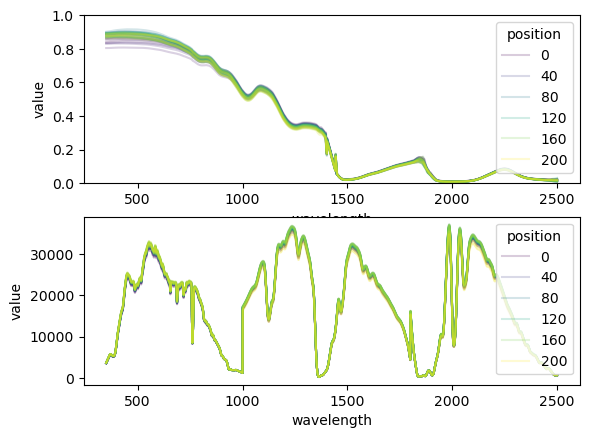

In [205]:
f, axs = plt.subplots(2,1)

sns.lineplot(data=df_day_site.query('variable == "albedo"'), x='wavelength', y='value',
            hue='position', ax=axs[0], alpha=0.2, palette='viridis')
axs[0].set_ylim([0, 1])

sns.lineplot(data=df_day_site.query('variable == "incident_solar_counts"'), x='wavelength', y='value',
            hue='position', ax=axs[1], alpha=0.2, palette='viridis')

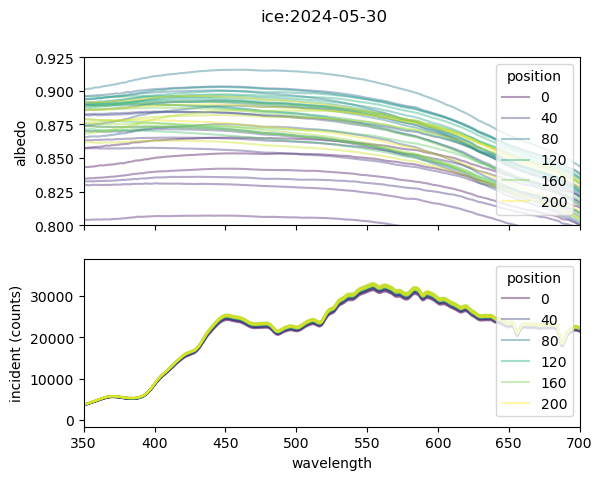

In [211]:
f, axs = plt.subplots(2,1, sharex=True)

sns.lineplot(data=df_day_site.query('variable == "albedo"'), x='wavelength', y='value',
            hue='position', ax=axs[0], alpha=0.4, palette='viridis')
axs[0].set_ylim([0, 1])
axs[0].set_xlim([350, 700])
axs[0].set_ylim([0.8, 0.925])
axs[0].set_ylabel('albedo')

sns.lineplot(data=df_day_site.query('variable == "incident_solar_counts"'), x='wavelength', y='value',
            hue='position', ax=axs[1], alpha=0.4, palette='viridis')
axs[1].set_ylabel('incident (counts)')

f.suptitle(site + ':' + day)

f.savefig(os.path.join(fg_dir, 'zoom_vis_'+day+'_'+site+'.png'), bbox_inches='tight')

### 2.b Linearly interpolate incident?

Examining the incident values we find two things
 1. Often the temporal variablility in the IR exceeds that at 600 nm
 2. The changes over time are sometimes slow moving.
 
Update, there is limited evidence that interpolation helps here.

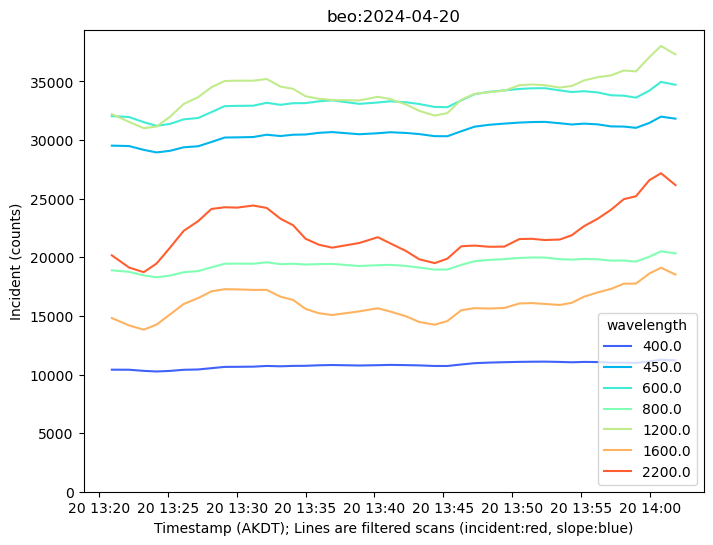

In [289]:
day = '2024-04-20'
site = 'beo'

# Get data just from requested day-site
df_day_site = df_a2.xs((slice(day, day), site), 
                       level=('timestamp_akdt', 'site'), drop_level=False)

# Plot incident over time at a collection of wavelengths
wvs = [400, 450, 600, 800, 1200, 1600, 2200]

f, ax = plt.subplots(1,1, figsize=(8,6))

# Plot incident over time
df_temp = df_day_site.query('variable == "incident_solar_counts" & wavelength in @wvs').reset_index()
df_temp['wavelength'] = df_temp['wavelength'].astype('str')
sns.lineplot(data=df_temp, x='timestamp_akdt', y='value', hue='wavelength', 
                  palette='rainbow', ax=ax)
ymin, ymax = ax.get_ylim()
ax.set_ylim([0, ymax])

# Plot filtered scans
df_filt = df_day_site.query('variable == "asd_quality_flag" & wavelength == 350.0')
ymin, ymax = ax.get_ylim()
ax.vlines(x=df_filt.loc[df_filt['value']==2.0].index.get_level_values('timestamp_akdt').values,
          ymin=ymin, ymax=ymax, ls='--', color='r')
ax.vlines(x=df_filt.loc[df_filt['value']==4.0].index.get_level_values('timestamp_akdt').values,
          ymin=ymin, ymax=ymax, ls='--', color='b')

ax.set_ylabel('Incident (counts)')
ax.set_xlabel('Timestamp (AKDT); Lines are filtered scans (incident:red, slope:blue)')
ax.set_title(site + ':' + day)

f.savefig(os.path.join(fg_dir, 'inc_timeseries_'+day+'_'+site+'.png'), bbox_inches='tight')

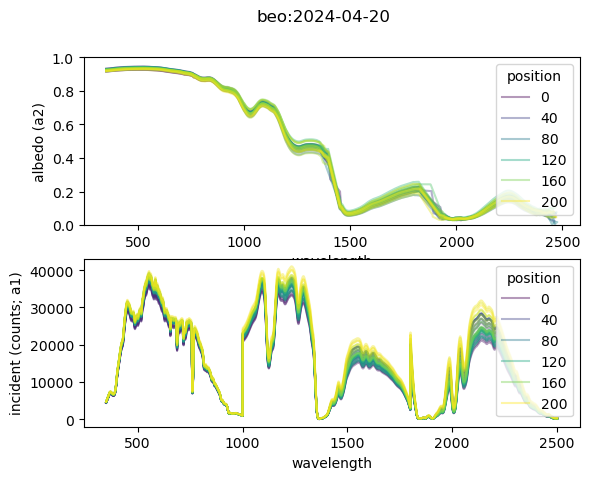

In [290]:
# Plot summary figure

f, axs = plt.subplots(2,1)

# Get filtered data for plotting albedo
df_temp = df_day_site.query('variable in ["albedo", "incident_solar_counts", '+
                            '"reflected_solar_counts", "asd_quality_flag"]').reset_index(
    ).drop(columns=['timestamp_akdt', 'site', 'location', 'repetition']).pivot(
    index=['wavelength', 'position'], columns='variable', values='value')
df_temp = df_temp.loc[df_temp['asd_quality_flag'] == 1.0]

sns.lineplot(data=df_temp, x='wavelength', y='albedo',
            hue='position', ax=axs[0], alpha=0.4, palette='viridis')
axs[0].set_ylim([0, 1])
axs[0].set_ylabel('albedo (a2)')
sns.move_legend(axs[0], loc='upper right')

sns.lineplot(data=df_day_site.query('variable == "incident_solar_counts"'), x='wavelength', y='value',
            hue='position', ax=axs[1], alpha=0.4, palette='viridis')
axs[1].set_ylabel('incident (counts; a1)')

f.suptitle(site + ':' + day)

f.savefig(os.path.join(fg_dir, day+'_'+site+'.a2.png'), bbox_inches='tight')

In [293]:
df_inc_intrp = df_day_site.query(
    'variable in ["incident_solar_counts", "reflected_solar_counts"]').reset_index()
# Convert reflected solar counts values to nan, so that we can interpolate these timepoints
df_inc_intrp.loc[df_inc_intrp['variable']=='reflected_solar_counts', 'value'] = np.NaN
df_inc_intrp.loc[df_inc_intrp['variable']=='reflected_solar_counts', 'variable'] = 'incident_intrp_counts'
df_inc_intrp = df_inc_intrp.pivot(columns='wavelength', values='value', index=
    ['timestamp_akdt', 'site', 'location', 'position', 'repetition', 'variable'])
# Save full multiindex for later, (note that timestamps are unique)
mi_full = df_inc_intrp.index.copy()
df_inc_intrp.index = df_inc_intrp.index.droplevel(level=[
    'site', 'location', 'position', 'repetition', 'variable'])
# Interpolate, for now let's try linear
df_inc_intrp.interpolate(method='piecewise_polynomial', order=2, inplace=True)
# Return multiindex, return just intrp values to long form
df_inc_intrp.index = mi_full
df_inc_intrp = df_inc_intrp.query('variable == "incident_intrp_counts"').melt(ignore_index=False)
df_inc_intrp.set_index('wavelength', append=True, inplace=True)
df_inc_intrp = df_inc_intrp.reorder_levels(
    ['timestamp_akdt', 'site', 'location', 'position', 'repetition', 'wavelength', 'variable'])

df_inc_intrp.index = df_inc_intrp.index.droplevel('variable')
df_ref = df_day_site.query('variable == "reflected_solar_counts"')
df_ref.index = df_ref.index.droplevel('variable')
df_alb_intrp = df_ref.div(df_inc_intrp)

(0.35, 0.55)

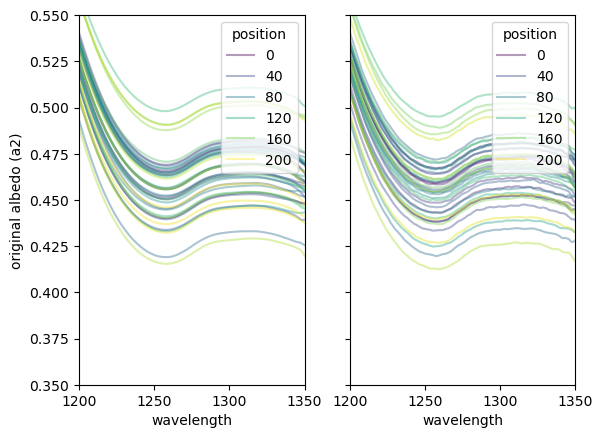

In [294]:
f, axs = plt.subplots(1,2,sharex=True, sharey=True)

# Plot original
sns.lineplot(data=df_day_site.query('variable == "albedo"'), x='wavelength', y='value',
            hue='position', ax=axs[0], alpha=0.4, palette='viridis')
axs[0].set_ylim([0, 1])
axs[0].set_ylabel('original albedo (a2)')
sns.move_legend(axs[0], loc='upper right')

# Plot interpolated albedo
sns.lineplot(data=df_alb_intrp, x='wavelength', y='value',
            hue='position', ax=axs[1], alpha=0.4, palette='viridis')
axs[1].set_ylim([0, 1])
axs[1].set_ylabel('incident interpolate albedo (a2)')
sns.move_legend(axs[1], loc='upper right')

axs[1].set_xlim([1200, 1350])
axs[1].set_ylim([0.35, 0.55])

### 2.c Standard deviation filter

Examine 20240606-arm because we know it has examples of issues.

In [163]:
day = '2024-06-06'
site = 'arm'

# Get data just from requested day-site
df_day_site = df_a2.xs((slice(day, day), site), 
                       level=('timestamp_akdt', 'site'), drop_level=False)

In [107]:
# Compute rolling standard deviation
df_alb = df_day_site.query('variable == "albedo"').reset_index()
df_alb = df_alb.pivot(index='wavelength', values='value',
            columns=['timestamp_akdt', 'site', 'location', 'repetition', 'position', 'variable'])

df_std = df_alb.rolling(20, center=True, min_periods=1).std()
df_std = df_std.melt(ignore_index=False)
df_std['variable'] = 'rolling_std'
df_std.set_index(['timestamp_akdt', 'site', 'location', 'position', 'repetition', 'variable'],
                  append=True, inplace=True)
df_std = df_std.reorder_levels(
    ['timestamp_akdt', 'site', 'location', 'position', 'repetition', 'wavelength', 'variable']) 


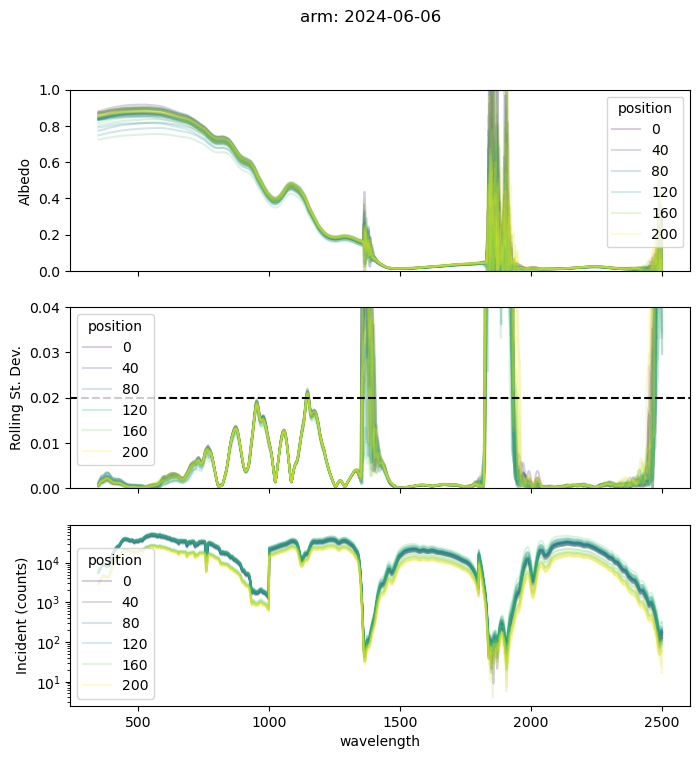

In [114]:
# Plot comparison of albedos, rolling standard deviation, and incident

f, axs = plt.subplots(3, 1, sharex=True, figsize=(8,8))

sns.lineplot(data=df_day_site.query('variable == "albedo"'), x='wavelength', y='value',
            hue='position', ax=axs[0], alpha=0.2, palette='viridis')
axs[0].set_ylim([0, 1])
axs[0].set_ylabel('Albedo')

sns.lineplot(data=df_std, x='wavelength', y='value',
            hue='position', ax=axs[1], alpha=0.2, palette='viridis')
axs[1].axhline(y=0.02, ls='--', c='k')
axs[1].set_ylim([0, 0.04])
axs[1].set_ylabel('Rolling St. Dev.')

sns.lineplot(data=df_day_site.query('variable == "incident_solar_counts"'), x='wavelength', y='value',
            hue='position', ax=axs[2], alpha=0.2, palette='viridis')
#axs[2].set_ylim([0, 1])
axs[2].set_yscale('log')
axs[2].set_ylabel('Incident (counts)')

f.suptitle(site + ': ' + day)

f.savefig(os.path.join(fg_dir, 'rolling_std_'+day+'_'+site+'.png'), bbox_inches='tight')

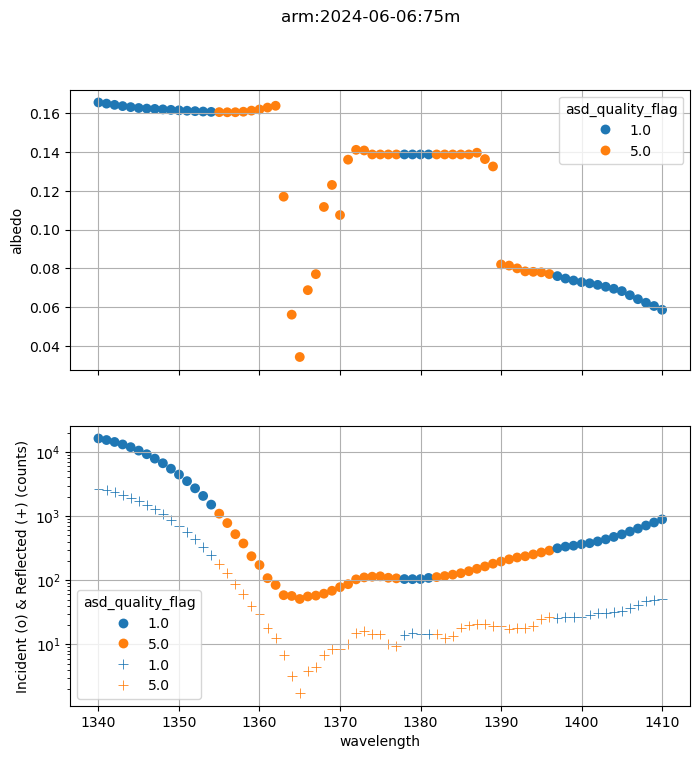

In [157]:
pos = [75]#, 50, 140, 145, 150]
wv_min = 1340
wv_max = 1410
ps = 50 

df_temp = df_day_site.query('variable in ["albedo", "incident_solar_counts", '+
                            '"reflected_solar_counts", "asd_quality_flag"]').reset_index(
    ).drop(columns=['timestamp_akdt', 'site', 'location', 'repetition']).pivot(
    index=['wavelength', 'position'], columns='variable', values='value')
df_temp['asd_quality_flag'] = df_temp['asd_quality_flag'].astype("string")


f, axs = plt.subplots(2, 1, sharex=True, figsize=(8,8))

sns.scatterplot(data=df_temp.query('position in @pos & wavelength >= @wv_min & wavelength <= @wv_max'), x='wavelength', y='albedo', hue='asd_quality_flag',
           marker='o', edgecolor='none', s=ps, ax=axs[0])
#axs[0].set_ylim([0, 1])
axs[0].grid()

sns.scatterplot(data=df_temp.query('position in @pos & wavelength >= @wv_min & wavelength <= @wv_max'), 
                x='wavelength', y='incident_solar_counts', hue='asd_quality_flag',
           marker='o', edgecolor='none', s=ps, ax=axs[1])
sns.scatterplot(data=df_temp.query('position in @pos & wavelength >= @wv_min & wavelength <= @wv_max'), 
                x='wavelength', y='reflected_solar_counts', hue='asd_quality_flag',
           marker='+', s=ps, ax=axs[1])
#axs[0].set_ylim([0, 1])
axs[1].set_ylabel('Incident (o) & Reflected (+) (counts)')
axs[1].set_yscale('log')
axs[1].grid()

f.suptitle(site + ':' + day + ':' + str(pos[0])+ 'm')

f.savefig(os.path.join(fg_dir, 'zoom_'+day+'_'+site+'_'+str(pos[0])
                       +'m_'+str(wv_min)+'_'+str(wv_max)+'nm.png'), bbox_inches='tight')

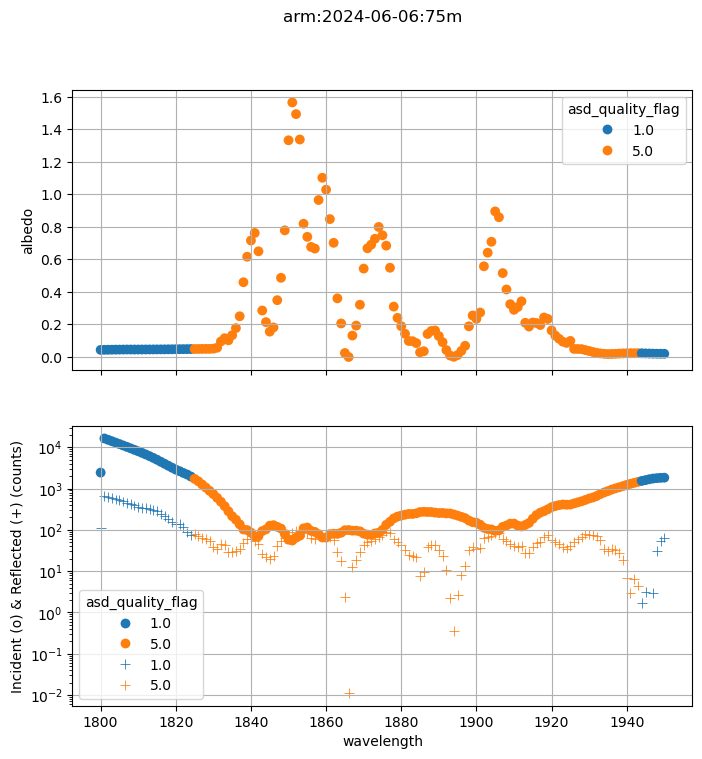

In [158]:
pos = [75]#, 50, 140, 145, 150]
wv_min = 1800
wv_max = 1950
ps = 50 

df_temp = df_day_site.query('variable in ["albedo", "incident_solar_counts", '+
                            '"reflected_solar_counts", "asd_quality_flag"]').reset_index(
    ).drop(columns=['timestamp_akdt', 'site', 'location', 'repetition']).pivot(
    index=['wavelength', 'position'], columns='variable', values='value')
df_temp['asd_quality_flag'] = df_temp['asd_quality_flag'].astype("string")


f, axs = plt.subplots(2, 1, sharex=True, figsize=(8,8))

sns.scatterplot(data=df_temp.query('position in @pos & wavelength >= @wv_min & wavelength <= @wv_max'), x='wavelength', y='albedo', hue='asd_quality_flag',
           marker='o', edgecolor='none', s=ps, ax=axs[0])
#axs[0].set_ylim([0, 1])
axs[0].grid()

sns.scatterplot(data=df_temp.query('position in @pos & wavelength >= @wv_min & wavelength <= @wv_max'), 
                x='wavelength', y='incident_solar_counts', hue='asd_quality_flag',
           marker='o', edgecolor='none', s=ps, ax=axs[1])
sns.scatterplot(data=df_temp.query('position in @pos & wavelength >= @wv_min & wavelength <= @wv_max'), 
                x='wavelength', y='reflected_solar_counts', hue='asd_quality_flag',
           marker='+', s=ps, ax=axs[1])
#axs[0].set_ylim([0, 1])
axs[1].set_ylabel('Incident (o) & Reflected (+) (counts)')
axs[1].set_yscale('log')
axs[1].grid()

f.suptitle(site + ':' + day + ':' + str(pos[0])+ 'm')
f.savefig(os.path.join(fg_dir, 'zoom_'+day+'_'+site+'_'+str(pos[0])
                       +'m_'+str(wv_min)+'_'+str(wv_max)+'nm.png'), bbox_inches='tight')

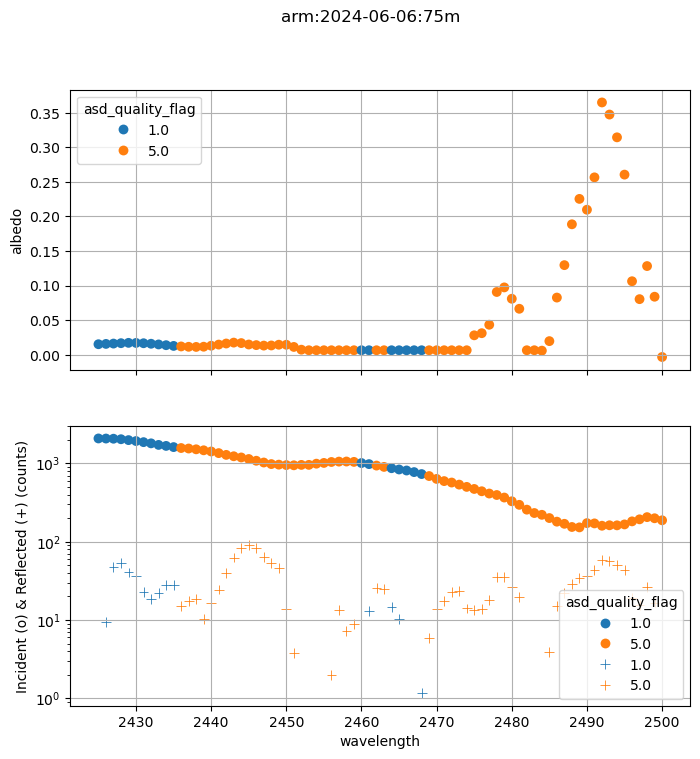

In [159]:
pos = [75]#, 50, 140, 145, 150]
wv_min = 2425
wv_max = 2500
ps = 50 

df_temp = df_day_site.query('variable in ["albedo", "incident_solar_counts", '+
                            '"reflected_solar_counts", "asd_quality_flag"]').reset_index(
    ).drop(columns=['timestamp_akdt', 'site', 'location', 'repetition']).pivot(
    index=['wavelength', 'position'], columns='variable', values='value')
df_temp['asd_quality_flag'] = df_temp['asd_quality_flag'].astype("string")


f, axs = plt.subplots(2, 1, sharex=True, figsize=(8,8))

sns.scatterplot(data=df_temp.query('position in @pos & wavelength >= @wv_min & wavelength <= @wv_max'), x='wavelength', y='albedo', hue='asd_quality_flag',
           marker='o', edgecolor='none', s=ps, ax=axs[0])
#axs[0].set_ylim([0, 1])
axs[0].grid()

sns.scatterplot(data=df_temp.query('position in @pos & wavelength >= @wv_min & wavelength <= @wv_max'), 
                x='wavelength', y='incident_solar_counts', hue='asd_quality_flag',
           marker='o', edgecolor='none', s=ps, ax=axs[1])
sns.scatterplot(data=df_temp.query('position in @pos & wavelength >= @wv_min & wavelength <= @wv_max'), 
                x='wavelength', y='reflected_solar_counts', hue='asd_quality_flag',
           marker='+', s=ps, ax=axs[1])
#axs[0].set_ylim([0, 1])
axs[1].set_ylabel('Incident (o) & Reflected (+) (counts)')
axs[1].set_yscale('log')
axs[1].grid()

f.suptitle(site + ':' + day + ':' + str(pos[0])+ 'm')

f.savefig(os.path.join(fg_dir, 'zoom_'+day+'_'+site+'_'+str(pos[0])
                       +'m_'+str(wv_min)+'_'+str(wv_max)+'nm.png'), bbox_inches='tight')

Text(0.5, 0.98, 'arm:2024-06-06:75m')

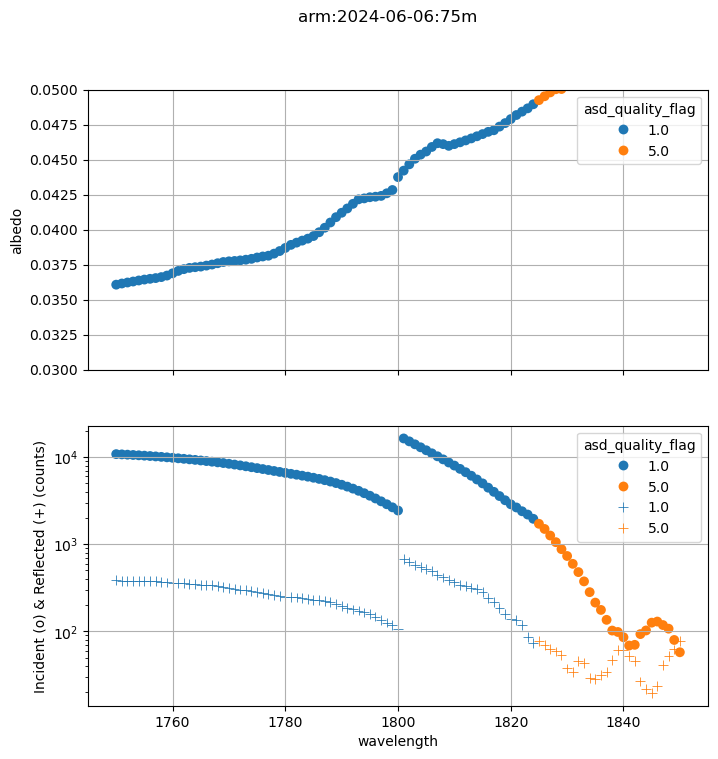

In [162]:
pos = [75]#, 50, 140, 145, 150]
wv_min = 1750
wv_max = 1850
ps = 50 

df_temp = df_day_site.query('variable in ["albedo", "incident_solar_counts", '+
                            '"reflected_solar_counts", "asd_quality_flag"]').reset_index(
    ).drop(columns=['timestamp_akdt', 'site', 'location', 'repetition']).pivot(
    index=['wavelength', 'position'], columns='variable', values='value')
df_temp['asd_quality_flag'] = df_temp['asd_quality_flag'].astype("string")


f, axs = plt.subplots(2, 1, sharex=True, figsize=(8,8))

sns.scatterplot(data=df_temp.query('position in @pos & wavelength >= @wv_min & wavelength <= @wv_max'), x='wavelength', y='albedo', hue='asd_quality_flag',
           marker='o', edgecolor='none', s=ps, ax=axs[0])
axs[0].set_ylim([0.03, 0.05])
axs[0].grid()

sns.scatterplot(data=df_temp.query('position in @pos & wavelength >= @wv_min & wavelength <= @wv_max'), 
                x='wavelength', y='incident_solar_counts', hue='asd_quality_flag',
           marker='o', edgecolor='none', s=ps, ax=axs[1])
sns.scatterplot(data=df_temp.query('position in @pos & wavelength >= @wv_min & wavelength <= @wv_max'), 
                x='wavelength', y='reflected_solar_counts', hue='asd_quality_flag',
           marker='+', s=ps, ax=axs[1])
#axs[0].set_ylim([0, 1])
axs[1].set_ylabel('Incident (o) & Reflected (+) (counts)')
axs[1].set_yscale('log')
axs[1].grid()

f.suptitle(site + ':' + day + ':' + str(pos[0])+ 'm')

## 3. Explore alternatives to standard deviation filter

    Physically, unreasonable albedo values arise when the incident irradiance approaches the measurement uncertainty (factoring in the instrument itself and how measurements are made). What if we had an incident irradiance cutoff for each detector (or maybe it needs more spectral resolution)? To assess this cutoff, let's consider the measurement noise on brilliantly clear days and partially cloudy ones.

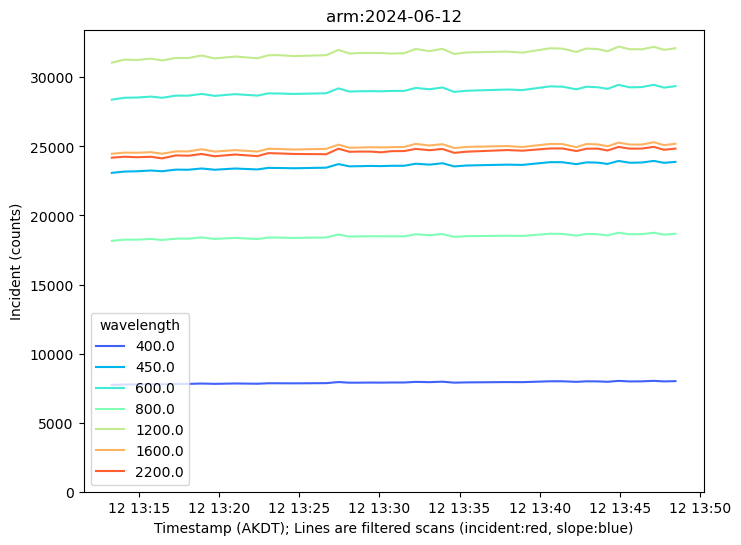

In [295]:
# Examine incident irradiance on a brilliantly clear day.
day = '2024-06-12'
site = 'arm'

# Get data just from requested day-site
df_day_site = df_a2.xs((slice(day, day), site), 
                       level=('timestamp_akdt', 'site'), drop_level=False)

# Plot incident over time at a collection of wavelengths
wvs = [400, 450, 600, 800, 1200, 1600, 2200]

f, ax = plt.subplots(1,1, figsize=(8,6))

# Plot incident over time
df_temp = df_day_site.query('variable == "incident_solar_counts" & wavelength in @wvs').reset_index()
df_temp['wavelength'] = df_temp['wavelength'].astype('str')
sns.lineplot(data=df_temp, x='timestamp_akdt', y='value', hue='wavelength', 
                  palette='rainbow', ax=ax)
ymin, ymax = ax.get_ylim()
ax.set_ylim([0, ymax])

# Plot filtered scans
df_filt = df_day_site.query('variable == "asd_quality_flag" & wavelength == 350.0')
ymin, ymax = ax.get_ylim()
ax.vlines(x=df_filt.loc[df_filt['value']==2.0].index.get_level_values('timestamp_akdt').values,
          ymin=ymin, ymax=ymax, ls='--', color='r')
ax.vlines(x=df_filt.loc[df_filt['value']==4.0].index.get_level_values('timestamp_akdt').values,
          ymin=ymin, ymax=ymax, ls='--', color='b')

ax.set_ylabel('Incident (counts)')
ax.set_xlabel('Timestamp (AKDT); Lines are filtered scans (incident:red, slope:blue)')
ax.set_title(site + ':' + day)

f.savefig(os.path.join(fg_dir, 'inc_timeseries_'+day+'_'+site+'.png'), bbox_inches='tight')

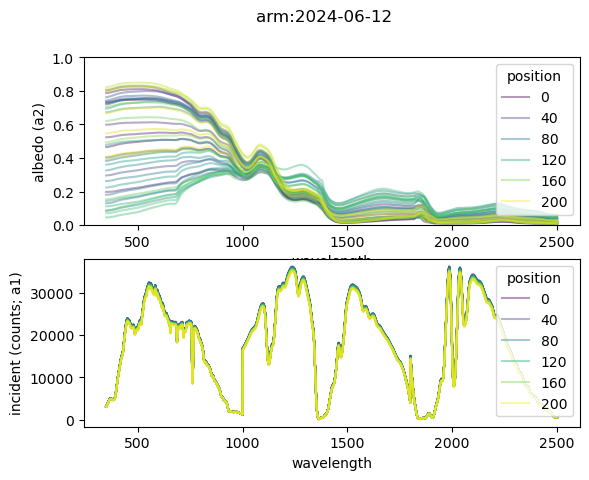

In [298]:
# Plot summary figure

f, axs = plt.subplots(2,1)

# Get filtered data for plotting albedo
df_temp = df_day_site.query('variable in ["albedo", "incident_solar_counts", '+
                            '"reflected_solar_counts", "asd_quality_flag"]').reset_index(
    ).drop(columns=['timestamp_akdt', 'site', 'location', 'repetition']).pivot(
    index=['wavelength', 'position'], columns='variable', values='value')
df_temp = df_temp.loc[df_temp['asd_quality_flag'] == 1.0]

sns.lineplot(data=df_temp, x='wavelength', y='albedo',
            hue='position', ax=axs[0], alpha=0.4, palette='viridis')
#sns.lineplot(data=df_day_site.query('variable == "albedo"'), x='wavelength', y='value',
#            hue='position', ax=axs[0], alpha=0.4, palette='viridis')


axs[0].set_ylim([0, 1])
axs[0].set_ylabel('albedo (a2)')
sns.move_legend(axs[0], loc='upper right')

sns.lineplot(data=df_day_site.query('variable == "incident_solar_counts"'), x='wavelength', y='value',
            hue='position', ax=axs[1], alpha=0.4, palette='viridis')
axs[1].set_ylabel('incident (counts; a1)')

f.suptitle(site + ':' + day)

f.savefig(os.path.join(fg_dir, day+'_'+site+'.a2.png'), bbox_inches='tight')

In [320]:
deg = 2 # degree of polynomial

# Fit polynomial to change in irradiance over time so that we can look at anomalies
df_inc = df_day_site.query('variable == "incident_solar_counts"').reset_index().drop(
    columns=['position', 'site', 'location', 'repetition', 'variable'])
df_inc = df_inc.pivot(columns='wavelength', index='timestamp_akdt', values='value')

df_fit = df_inc.copy()

# For each column fit a polynomial and evaluate at the incident measurement times
for col in df_inc.columns:
    res = np.polynomial.Polynomial.fit(df_inc.index.astype(np.int64).astype(float), 
                                       df_inc[col].values, deg)
    df_fit[col] = res(df_inc.index.astype(np.int64).astype(float))

In [321]:
df_res = df_inc - df_fit

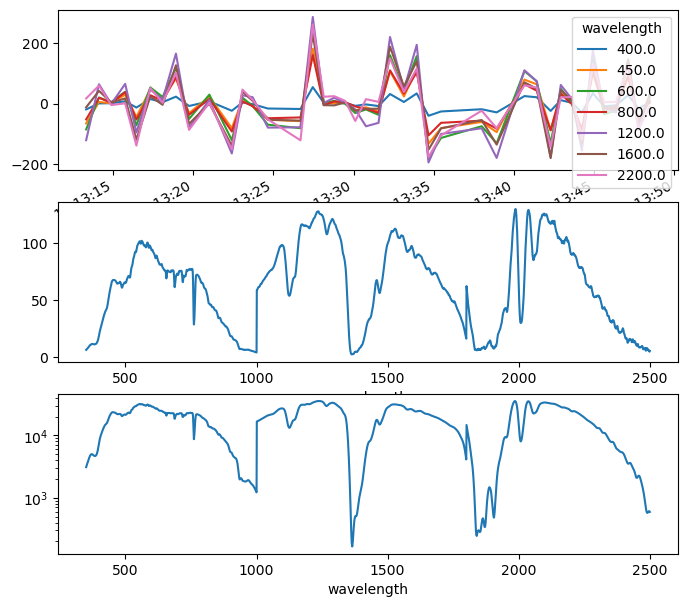

In [331]:
f, axs = plt.subplots(3,1, figsize=(8,8))

wvs = [400, 450, 600, 800, 1200, 1600, 2200]

# Plot incident over time

df_res[wvs].plot(ax=axs[0])

df_res.std(axis=0).plot(ax=axs[1])

df_inc.mean(axis=0).plot(ax=axs[2])
axs[2].set_yscale('log')

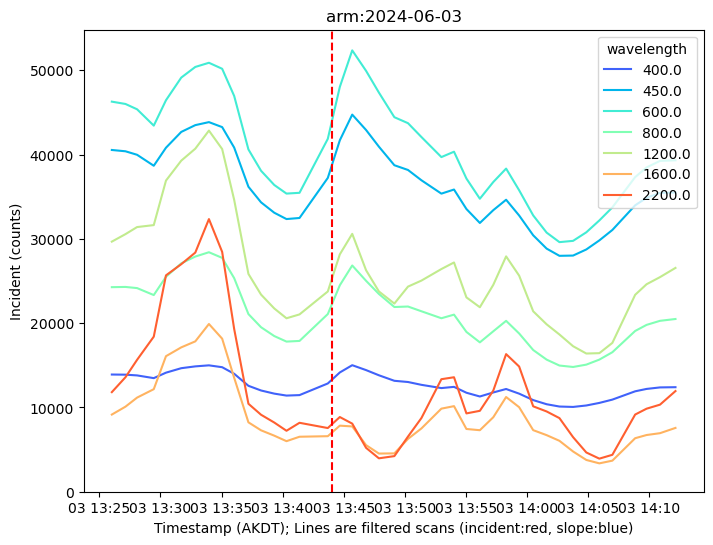

In [329]:
# Examine incident irradiance on a cloudy, slow moving day.
day = '2024-06-03'
site = 'arm'

# Get data just from requested day-site
df_day_site = df_a2.xs((slice(day, day), site), 
                       level=('timestamp_akdt', 'site'), drop_level=False)

# Plot incident over time at a collection of wavelengths
wvs = [400, 450, 600, 800, 1200, 1600, 2200]

f, ax = plt.subplots(1,1, figsize=(8,6))

# Plot incident over time
df_temp = df_day_site.query('variable == "incident_solar_counts" & wavelength in @wvs').reset_index()
df_temp['wavelength'] = df_temp['wavelength'].astype('str')
sns.lineplot(data=df_temp, x='timestamp_akdt', y='value', hue='wavelength', 
                  palette='rainbow', ax=ax)
ymin, ymax = ax.get_ylim()
ax.set_ylim([0, ymax])

# Plot filtered scans
df_filt = df_day_site.query('variable == "asd_quality_flag" & wavelength == 350.0')
ymin, ymax = ax.get_ylim()
ax.vlines(x=df_filt.loc[df_filt['value']==2.0].index.get_level_values('timestamp_akdt').values,
          ymin=ymin, ymax=ymax, ls='--', color='r')
ax.vlines(x=df_filt.loc[df_filt['value']==4.0].index.get_level_values('timestamp_akdt').values,
          ymin=ymin, ymax=ymax, ls='--', color='b')

ax.set_ylabel('Incident (counts)')
ax.set_xlabel('Timestamp (AKDT); Lines are filtered scans (incident:red, slope:blue)')
ax.set_title(site + ':' + day)

f.savefig(os.path.join(fg_dir, 'inc_timeseries_'+day+'_'+site+'.png'), bbox_inches='tight')

Text(0.5, 0.98, 'arm:2024-06-03')

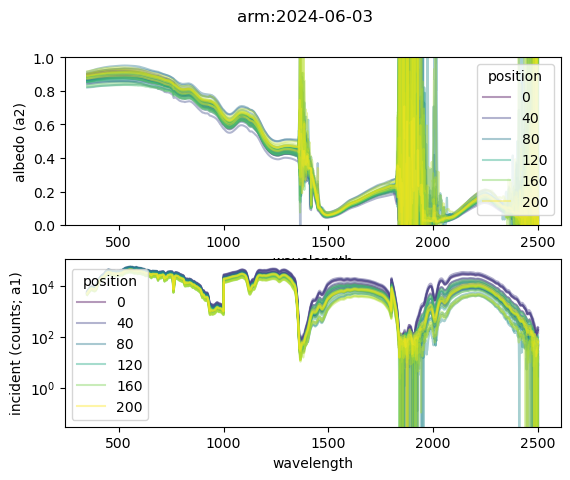

In [349]:
# Plot summary figure

f, axs = plt.subplots(2,1)

# Get filtered data for plotting albedo
df_temp = df_day_site.query('variable in ["albedo", "incident_solar_counts", '+
                            '"reflected_solar_counts", "asd_quality_flag"]').reset_index(
    ).drop(columns=['timestamp_akdt', 'site', 'location', 'repetition']).pivot(
    index=['wavelength', 'position'], columns='variable', values='value')
df_temp = df_temp.loc[df_temp['asd_quality_flag'] == 1.0]

#sns.lineplot(data=df_temp, x='wavelength', y='albedo',
#            hue='position', ax=axs[0], alpha=0.4, palette='viridis')
sns.lineplot(data=df_day_site.query('variable == "albedo"'), x='wavelength', y='value',
            hue='position', ax=axs[0], alpha=0.4, palette='viridis')


axs[0].set_ylim([0, 1])
axs[0].set_ylabel('albedo (a2)')
sns.move_legend(axs[0], loc='upper right')

sns.lineplot(data=df_day_site.query('variable == "incident_solar_counts"'), x='wavelength', y='value',
            hue='position', ax=axs[1], alpha=0.4, palette='viridis')
axs[1].set_ylabel('incident (counts; a1)')
axs[1].set_yscale('log')

f.suptitle(site + ':' + day)

#f.savefig(os.path.join(fg_dir, day+'_'+site+'.a2.png'), bbox_inches='tight')

In [350]:
deg = 20 # degree of polynomial

# Fit polynomial to change in irradiance over time so that we can look at anomalies
df_inc = df_day_site.query('variable == "incident_solar_counts"').reset_index().drop(
    columns=['position', 'site', 'location', 'repetition', 'variable'])
df_inc = df_inc.pivot(columns='wavelength', index='timestamp_akdt', values='value')

df_fit = df_inc.copy()

# For each column fit a polynomial and evaluate at the incident measurement times
for col in df_inc.columns:
    res = np.polynomial.Chebyshev.fit(df_inc.index.astype(np.int64).astype(float), 
                                       df_inc[col].values, deg)
    df_fit[col] = res(df_inc.index.astype(np.int64).astype(float))

In [351]:
df_res = df_inc - df_fit

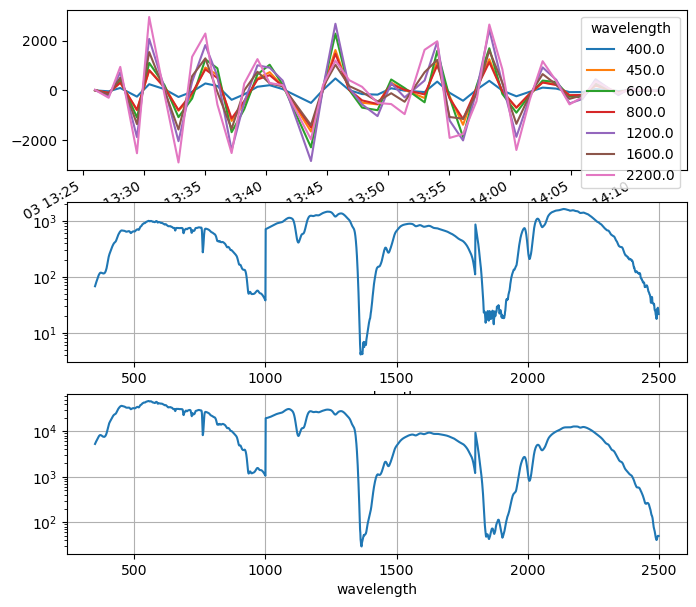

In [352]:
f, axs = plt.subplots(3,1, figsize=(8,8))

wvs = [400, 450, 600, 800, 1200, 1600, 2200]

# Plot incident over time

df_res[wvs].plot(ax=axs[0])

df_res.std(axis=0).plot(ax=axs[1])
axs[1].set_yscale('log')
axs[1].grid()

df_inc.mean(axis=0).plot(ax=axs[2])
axs[2].set_yscale('log')
axs[2].grid()

That doesn't obviously produce anything useful. Let's look at blatantly erroneous albedo values and see if we see anything useful

In [411]:
# Extract incident values that are greater than 1 (i.e., incident is too small)
# and were not flagged by incident filter or slope filter
df_nphys = df_a2.query('variable == "albedo" & value > 1').copy()
df_nphys['date_akdt'] = pd.to_datetime(df_nphys.index.get_level_values('timestamp_akdt').date)
df_nphys.set_index('date_akdt', append=True, inplace=True)

df_inc_nphys = df_a2.query('variable == "incident_solar_counts"').copy()
df_inc_nphys['date_akdt'] = pd.to_datetime(df_inc_nphys.index.get_level_values('timestamp_akdt').date)
df_inc_nphys.set_index('date_akdt', append=True, inplace=True)
df_inc_nphys.index = df_inc_nphys.index.droplevel(['timestamp_akdt', 'variable'])
df_inc_nphys = df_inc_nphys.loc[df_nphys.index.droplevel(['timestamp_akdt', 'variable']).values]

In [412]:

df_inc_nphys

value
site location position repetition wavelength date_akdt            
arm  line     60       1.0        1362.0     2024-04-19  14.470111
              190      1.0        1362.0     2024-04-19  26.739260
              60       1.0        1363.0     2024-04-19   6.405767
              105      1.0        1363.0     2024-04-19   8.809862
              135      1.0        1363.0     2024-04-19  24.577106
...                                                            ...
ice  line     0        1.0        1907.0     2024-06-15  13.565793
                                  1908.0     2024-06-15  17.424392
              80       1.0        1909.0     2024-06-15   9.034583
              0        1.0        1909.0     2024-06-15  27.415494
              80       1.0        1910.0     2024-06-15  17.766363

[13393 rows x 1 columns]

(array([9862.,  407.,  450., 1217.,  833.,  345.,   87.,   90.,   36.,
          66.]),
 array([  -43.71483666,  4142.87004809,  8329.45493284, 12516.03981759,
        16702.62470234, 20889.20958709, 25075.79447184, 29262.37935659,
        33448.96424134, 37635.54912609, 41822.13401084]),
 <BarContainer object of 10 artists>)

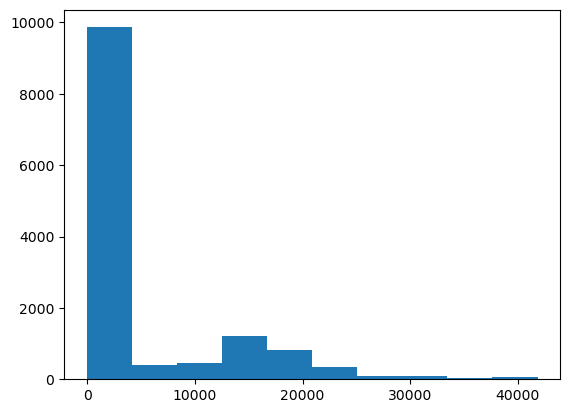

In [413]:
plt.hist(df_inc_nphys['value'].values)

In [414]:
df_inc_nphys_summ = df_inc_nphys.reset_index()[['wavelength', 'value']].groupby(by='wavelength').agg(['mean', 'median', 'std', 'max', 'size'])
df_inc_nphys_summ.columns = df_inc_nphys_summ.columns.droplevel(0)

In [415]:
df_inc_nphys_summ

,mean,median,std,max,size
wavelength,,,,,
350.0,2848.820760,2848.820760,NaN,2848.820760,1
351.0,3027.151213,3027.151213,128.303774,3117.875681,2
352.0,3116.019384,3116.019384,133.551703,3210.454699,2
353.0,3202.848234,3202.848234,138.726505,3300.942686,2
354.0,3288.728895,3288.728895,143.910533,3390.489009,2
...,...,...,...,...,...
2496.0,8.276132,6.010541,20.232874,54.395174,36
2497.0,8.259414,7.724812,16.380305,47.595524,36
2498.0,8.481851,9.765642,20.335580,54.269799,42


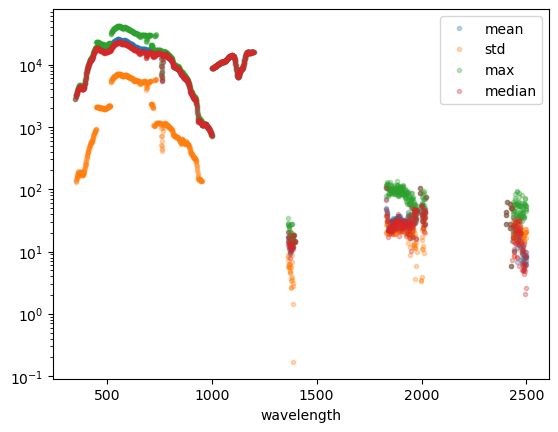

In [416]:
df_inc_nphys_summ[['mean', 'std', 'max', 'median']].plot(marker='.', ls='none', alpha=0.3)
plt.yscale('log')

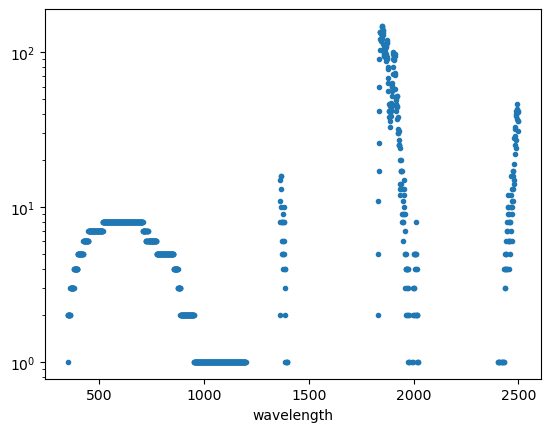

In [417]:
df_inc_nphys_summ['size'].plot(marker='.', ls='none')
plt.yscale('log')

<Axes: xlabel='wavelength'>

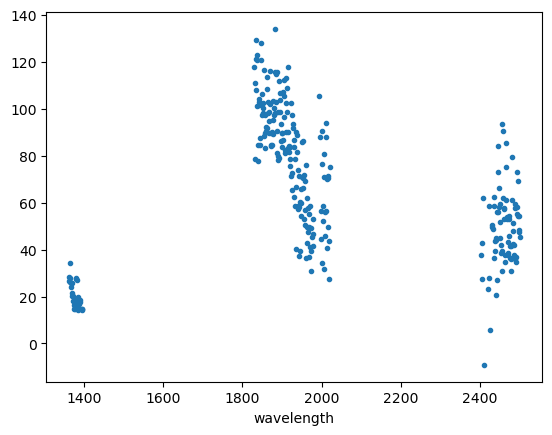

In [418]:
df_inc_nphys_summ.loc[1300:]['max'].plot(marker='.', ls='none')

In [474]:
# Flip side of this, look at incident on brilliantly clear day

# Examine incident irradiance on a brilliantly clear day.
day = '2024-06-13'#'2024-06-12'
site = 'ice' # 'arm'

# Get data just from requested day-site
df_day_site = df_a2.xs((slice(day, day), site), 
                       level=('timestamp_akdt', 'site'), drop_level=False)

(0.0, 300.0)

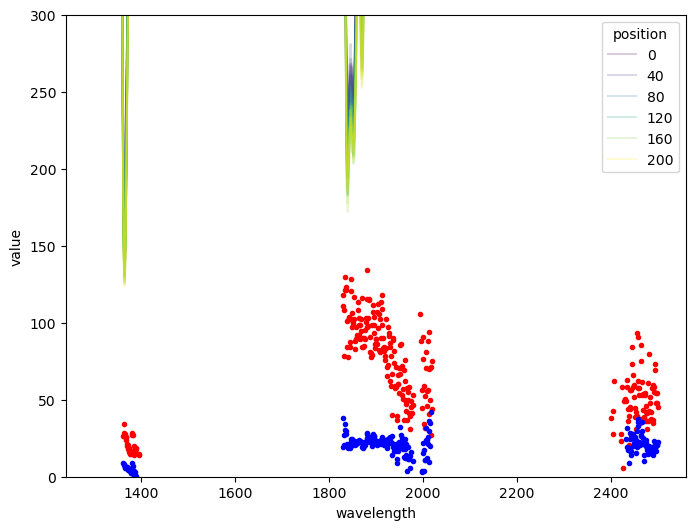

In [475]:
f, ax = plt.subplots(1, 1, figsize=(8,6))

wv_min = 1300

sns.lineplot(data=df_day_site.query('variable == "incident_solar_counts" & wavelength >= @wv_min'),
               x='wavelength', y='value', hue='position', ax=ax, alpha=0.2, palette='viridis')

df_inc_nphys_summ.loc[1300:]['max'].plot(marker='.', ls='none', color='r', ax=ax)
df_inc_nphys_summ.loc[1300:]['std'].plot(marker='.', ls='none', color='b', ax=ax)


#ax.set_yscale('log')
ax.set_ylim([0, 300])

In [438]:
wv_min = 1800
res = df_day_site.query('variable == "incident_solar_counts" & wavelength > @wv_min').idxmin()

In [439]:
res[0]

(Timestamp('2024-04-20 13:51:26-0800', tz='UTC-08:00'),
 'beo',
 'line',
 145,
 1.0,
 1906.0,
 'incident_solar_counts')

That looks promising, let's see if we can get all clear-sky days by looking at the maximum incident in the water vapor bands

In [469]:
#1365 nm is min of first water vapor band
#1906 nm is min of second

df_temp = df_a2.query('variable == "incident_solar_counts" & wavelength == 1906.0').reset_index()
df_temp['date_akdt'] = pd.to_datetime(df_temp['timestamp_akdt'].dt.date)
df_temp = df_temp[['date_akdt', 'site', 'value']].groupby(by=['date_akdt', 'site']).agg(['mean', 'max'])
df_temp.columns = df_temp.columns.droplevel(0)

In [470]:
df_temp.sort_values('max', ascending=False)

,,mean,max
date_akdt,site,,
2024-04-21,ice,1471.119732,1609.360505
2024-05-30,ice,652.429451,675.669655
2024-06-12,arm,489.168375,533.641639
2024-05-25,arm,297.618724,484.550261
2024-06-13,ice,406.218103,450.713005
2024-05-23,beo,182.249997,373.964242
2024-06-11,beo,205.630322,311.613973
2024-04-20,beo,216.914636,301.479318
2024-05-29,arm,208.129740,225.738109


notes

don't want to cut any of 6/12 arm


want to cut off some of second water vapor band for 6/13 ice, none of the first

Need to repeat this analysis with a1 data, the smoothing is confusing things

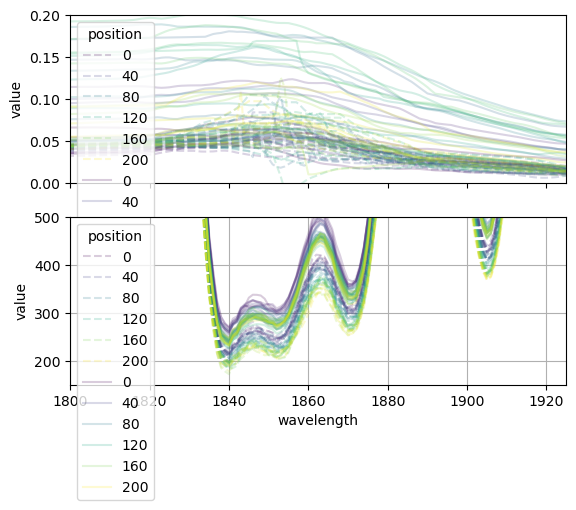

In [483]:
# Compare 
day = '2024-06-13'
site = 'ice'

# Get data just from requested day-site
df_day_site = df_a2.xs((slice(day, day), site), 
                       level=('timestamp_akdt', 'site'), drop_level=False)
day = '2024-06-12'
site = 'arm'
df_day_site2 = df_a2.xs((slice(day, day), site), 
                       level=('timestamp_akdt', 'site'), drop_level=False)

f, axs = plt.subplots(2,1, sharex=True)

sns.lineplot(data=df_day_site.query('variable == "albedo"'), x='wavelength', y='value',
            hue='position', ax=axs[0], alpha=0.2, palette='viridis', ls='--')
sns.lineplot(data=df_day_site2.query('variable == "albedo"'), x='wavelength', y='value',
            hue='position', ax=axs[0], alpha=0.2, palette='viridis', ls='-')
axs[0].set_ylim([0, 0.2])
axs[0].set_xlim([1800, 1925])

sns.lineplot(data=df_day_site.query('variable == "incident_solar_counts"'), x='wavelength', y='value',
            hue='position', ax=axs[1], alpha=0.2, palette='viridis', ls='--')
sns.lineplot(data=df_day_site2.query('variable == "incident_solar_counts"'), x='wavelength', y='value',
            hue='position', ax=axs[1], alpha=0.2, palette='viridis', ls='-')
axs[1].set_ylim([150, 500])
axs[1].grid()

<Axes: xlabel='wavelength', ylabel='value'>

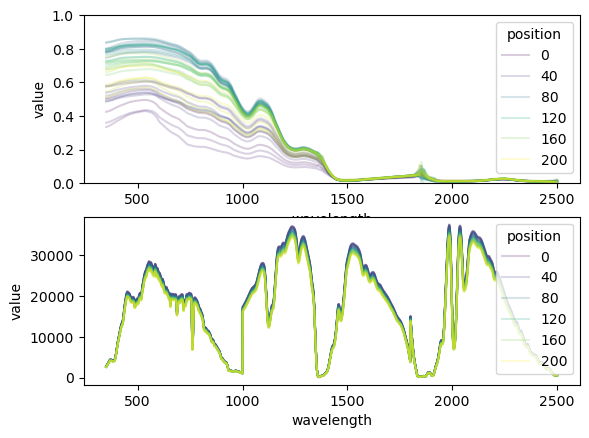

In [476]:
# Examine a site
day = '2024-06-13'
site = 'ice'

# Get data just from requested day-site
df_day_site = df_a2.xs((slice(day, day), site), 
                       level=('timestamp_akdt', 'site'), drop_level=False)

f, axs = plt.subplots(2,1)

sns.lineplot(data=df_day_site.query('variable == "albedo"'), x='wavelength', y='value',
            hue='position', ax=axs[0], alpha=0.2, palette='viridis')
axs[0].set_ylim([0, 1])

sns.lineplot(data=df_day_site.query('variable == "incident_solar_counts"'), x='wavelength', y='value',
            hue='position', ax=axs[1], alpha=0.2, palette='viridis')